In [127]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import env

In [128]:
from typing import Tuple


def load_scenario_data(name: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    scenario_one_path = Path("../" / env.OUTPUT_DIR / name)

    trips_df: pd.DataFrame = None
    route_times = []
    for directory in scenario_one_path.iterdir():
        scenario_df = pd.read_csv(directory / "trips.csv", skipinitialspace=True)
        trips_df = pd.concat([trips_df, scenario_df], ignore_index=True)

        with open(directory / "results.txt", "r") as f:
            lines = f.readlines()
            route_times.append(float(lines[3].split()[2]))

    routes_df = pd.DataFrame({"ROUTE_TIMES": route_times})

    return (trips_df, routes_df)

In [129]:
scenarios_data = {
    "ScenarioZero": load_scenario_data("ScenarioZero"),
    "ScenarioOne": load_scenario_data("ScenarioOne"),
}

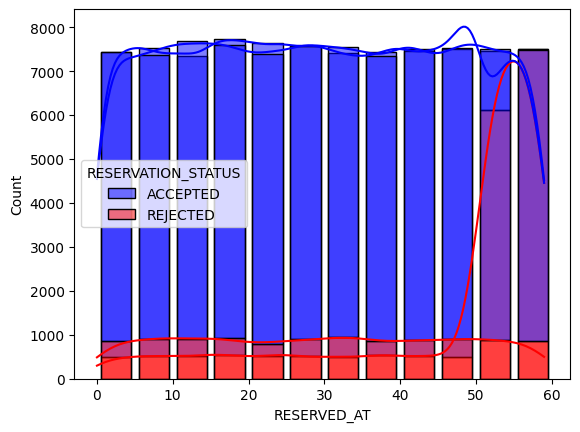

In [130]:
import seaborn as sns

colors = {"ACCEPTED": "blue", "REJECTED": "red"}

for name, data in scenarios_data.items():
    # Use seaborn to create the bar plot
    trips_df = data[0]
    sns.histplot(
        data=trips_df,
        x="RESERVED_AT",
        hue="RESERVATION_STATUS",
        multiple="stack",
        palette=colors,
        shrink=0.8,
        bins=range(0, 61, 5),
        kde=True,
    )

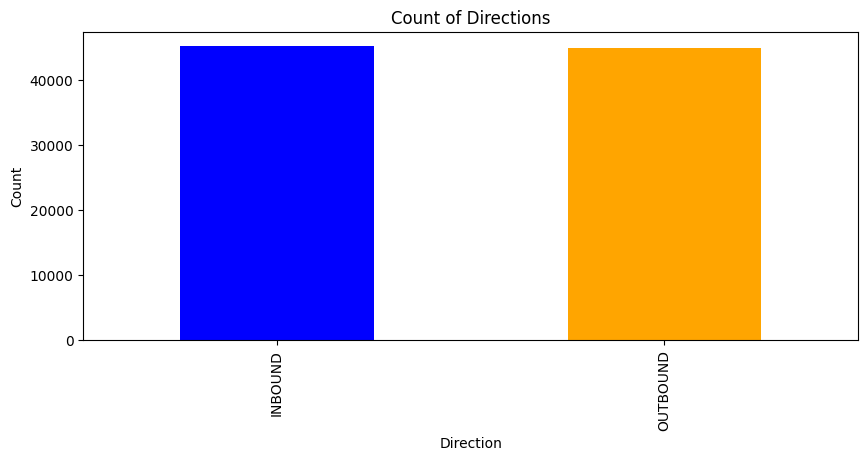

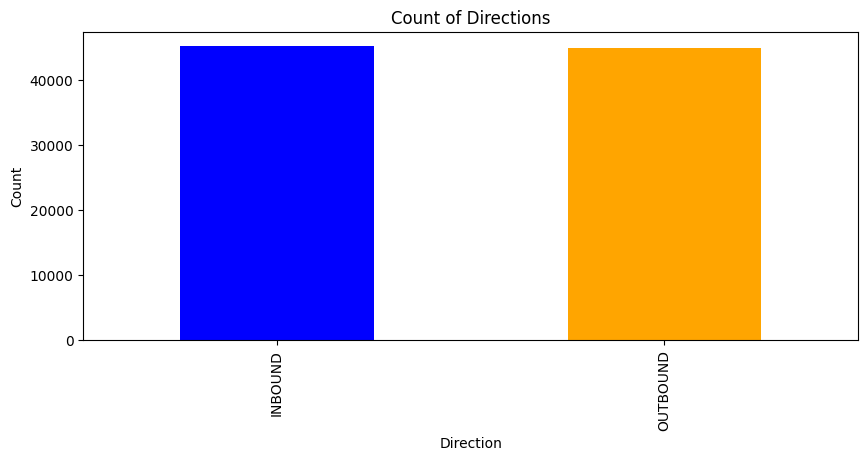

In [131]:
for name, data in scenarios_data.items():
    trips_df = data[0]
    direction_counts = trips_df["DIRECTION"].value_counts()
    plt.figure(figsize=(10, 4))
    direction_counts.plot(kind="bar", color=["blue", "orange"])
    plt.xlabel("Direction")
    plt.ylabel("Count")
    plt.title("Count of Directions")
    plt.show()

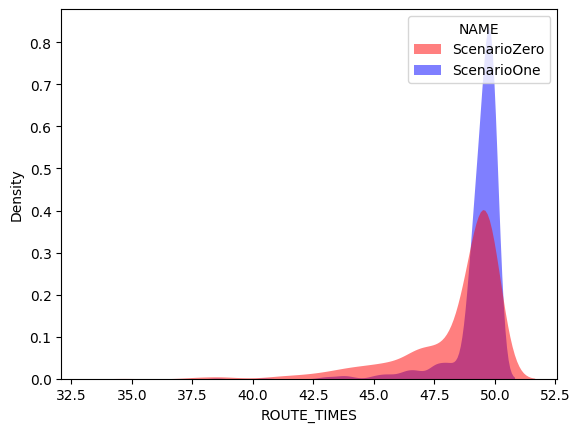

In [149]:
def plot_kde_for(df, x: str, hue: str = None, pallete: list = None):
    sns.kdeplot(
        data=df,
        x=x,
        hue=hue,
        fill=True,
        common_norm=False,
        palette=pallete,
        alpha=0.5,
        linewidth=0,
    )


routes_df = None
for name, data in scenarios_data.items():
    scenario_routes_df = data[1]
    scenario_routes_df["NAME"] = name
    routes_df = pd.concat([routes_df, scenario_routes_df], ignore_index=True)

plot_kde_for(routes_df, "ROUTE_TIMES", "NAME", ["red", "blue"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


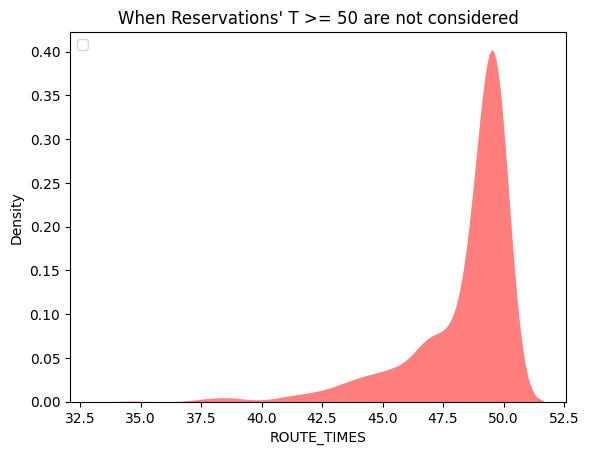

In [163]:
scenario_zero_routes_df = routes_df[routes_df["NAME"] == "ScenarioZero"]

plot_kde_for(scenario_zero_routes_df, "ROUTE_TIMES", "NAME", ["red"])
plt.title("When Reservations' T >= 50 are not considered")
plt.legend(loc="upper left")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


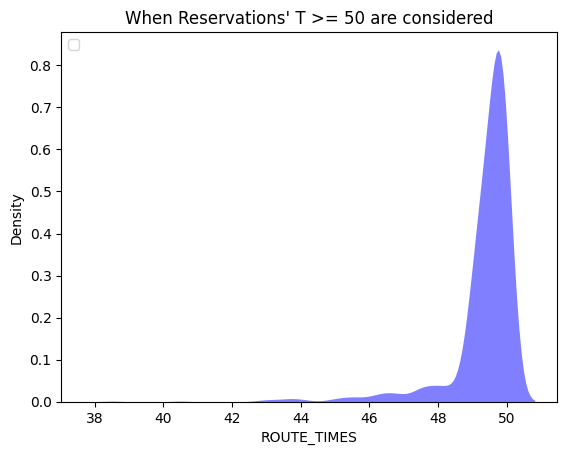

In [161]:
scenario_one_routes_df = routes_df[routes_df["NAME"] == "ScenarioOne"]

plot_kde_for(scenario_one_routes_df, "ROUTE_TIMES", "NAME", ["blue"])
plt.title("When Reservations' T >= 50 are considered")
plt.legend(loc="upper left")